# Projet CNN

In [125]:
import warnings
warnings.filterwarnings("ignore")

In [126]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.metrics import Precision, Recall
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import UpSampling2D, Dropout, Dense, Flatten

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras.utils import np_utils

In [127]:
from numpy import expand_dims
from imutils import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import cv2

In [128]:
train = pd.read_csv('data/train_cnn.csv')
test = pd.read_csv('data/test_cnn.csv')

In [129]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
train.shape

(42000, 785)

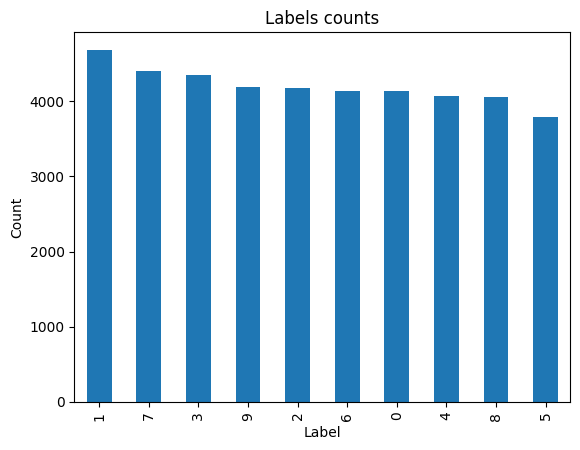

In [131]:
train.label.value_counts().plot(kind='bar')
plt.title('Labels counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [132]:
X = np.array(train.drop(['label'],axis=1))
y = train[['label']]

# X = train.drop(["label"], axis = 1)
# y = train["label"]

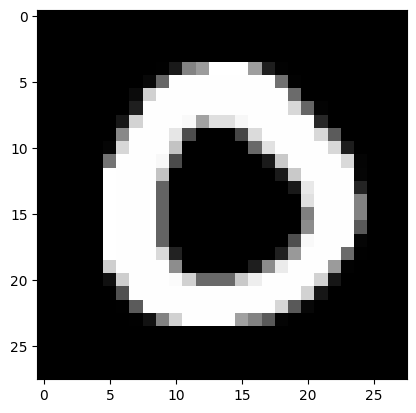

In [133]:
obs  = np.array(X)
img= obs[4]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.show()

In [134]:
print(X.shape)

(42000, 784)


In [135]:
# split training and validation data using sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2 , random_state=42)
# reshape and normalize test data
X_train = ((X_train).reshape((-1,28,28,1)))/255.0
X_test = ((X_test).reshape((-1 ,28,28,1)))/255.0


print('trianing set: ', X_train.shape, y_train.shape)
print('validation set: ', X_test.shape, y_test.shape)
print('test set: ', X_test.shape, y_test.shape)
print('nombre de classe', len(np.unique(y_train)))

trianing set:  (33600, 28, 28, 1) (33600, 1)
validation set:  (8400, 28, 28, 1) (8400, 1)
test set:  (8400, 28, 28, 1) (8400, 1)
nombre de classe 10


In [136]:
model = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(8, (3, 3), activation='relu',input_shape=(28, 28, 1)), # applies kernels to our data
        tf.keras.layers.MaxPooling2D(2, 2), # reduce dimension

        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),

        tf.keras.layers.Dense(len(train.label.unique()), activation=tf.nn.softmax) # generalized logistic regression
    ])


In [137]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 32)          4640      
                                                                 
 flatten_5 (Flatten)         (None, 288)              

In [138]:
METRICS = metrics=['accuracy',Precision(name='precision'),Recall(name='recall')]
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [139]:
#train neural network and have it automatically stop on 95% accuracy
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=32, verbose=1)

Epoch 1/10
1050/1050 [==============================] - 19s 16ms/step - loss: 0.2648 - accuracy: 0.9196 - val_loss: 0.1207 - val_accuracy: 0.9617
Epoch 2/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0798 - accuracy: 0.9756 - val_loss: 0.0731 - val_accuracy: 0.9773
Epoch 3/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0562 - accuracy: 0.9818 - val_loss: 0.0549 - val_accuracy: 0.9821
Epoch 4/10
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0445 - accuracy: 0.9860 - val_loss: 0.0484 - val_accuracy: 0.9844
Epoch 5/10
1050/1050 [==============================] - 15s 15ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0440 - val_accuracy: 0.9862
Epoch 6/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0560 - val_accuracy: 0.9826
Epoch 7/10
1050/1050 [==============================] - 16s 16ms/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.0449 -

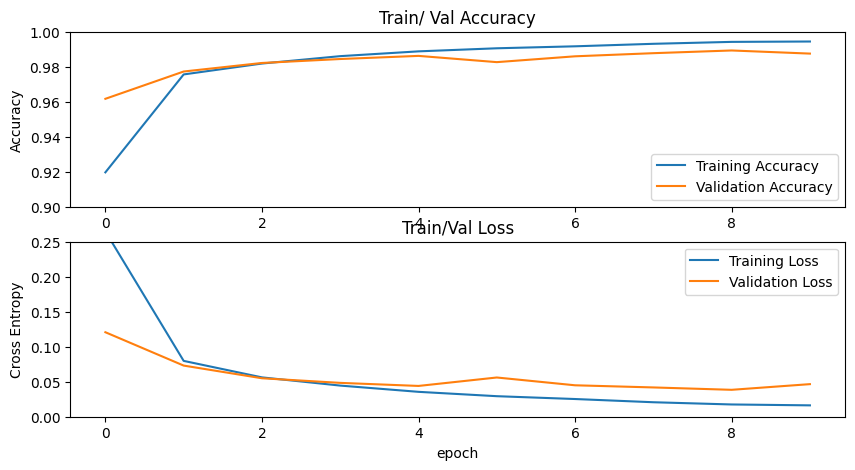

In [140]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0.9,1])
plt.title('Train/ Val Accuracy')



plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.ylabel('Cross Entropy')
plt.ylim([0,0.25])
plt.title('Train/Val Loss')
plt.xlabel('epoch')
plt.show()

In [141]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 32)          4640      
                                                                 
 flatten_5 (Flatten)         (None, 288)              

In [142]:
y_pred = model.predict(X_test)

263/263 [==============================] - 2s 7ms/step


In [143]:
y_pred=np.argmax(y_pred,axis=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       816
           1       0.99      1.00      0.99       909
           2       1.00      0.97      0.98       846
           3       0.98      1.00      0.99       937
           4       0.97      0.99      0.98       839
           5       0.99      0.96      0.98       702
           6       0.99      0.99      0.99       785
           7       0.99      0.99      0.99       893
           8       0.99      0.98      0.99       835
           9       0.98      0.99      0.98       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



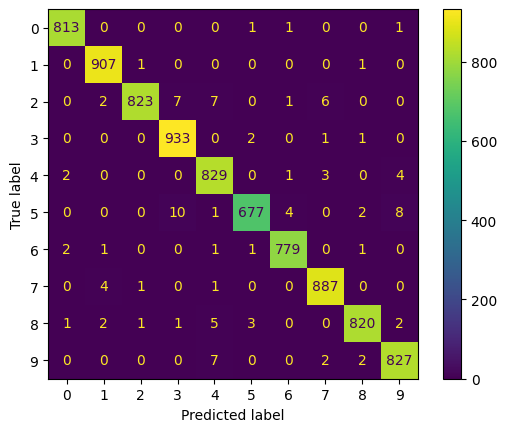

In [144]:
print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm)
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

# DATA AUGMENTATION

In [145]:
from numpy import expand_dims
from imutils import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import cv2

In [146]:
model = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(8, (3, 3), activation='relu',input_shape=(28, 28, 1)), # applies kernels to our data
        tf.keras.layers.MaxPooling2D(2, 2), # reduce dimension

        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),

        tf.keras.layers.Dense(len(train.label.unique()), activation=tf.nn.softmax) # generalized logistic regression
    ])


In [147]:
METRICS = metrics=['accuracy',Precision(name='precision'),Recall(name='recall')]
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [148]:
datagen = ImageDataGenerator(rotation_range=50,horizontal_flip=True,vertical_flip=True,
                             zoom_range=0.5, height_shift_range=0.2, fill_mode='nearest',
                             brightness_range=[0.5, 1.5], )



In [149]:
#train neural network and have it automatically stop on 95% accuracy
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=32, verbose=1)

Epoch 1/10
1050/1050 [==============================] - 19s 17ms/step - loss: 0.2696 - accuracy: 0.9170 - val_loss: 0.0984 - val_accuracy: 0.9685
Epoch 2/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0826 - accuracy: 0.9740 - val_loss: 0.0704 - val_accuracy: 0.9771
Epoch 3/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0594 - accuracy: 0.9828 - val_loss: 0.0622 - val_accuracy: 0.9802
Epoch 4/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0498 - accuracy: 0.9845 - val_loss: 0.0543 - val_accuracy: 0.9830
Epoch 5/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.0580 - val_accuracy: 0.9810
Epoch 6/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0520 - val_accuracy: 0.9827
Epoch 7/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0445 -

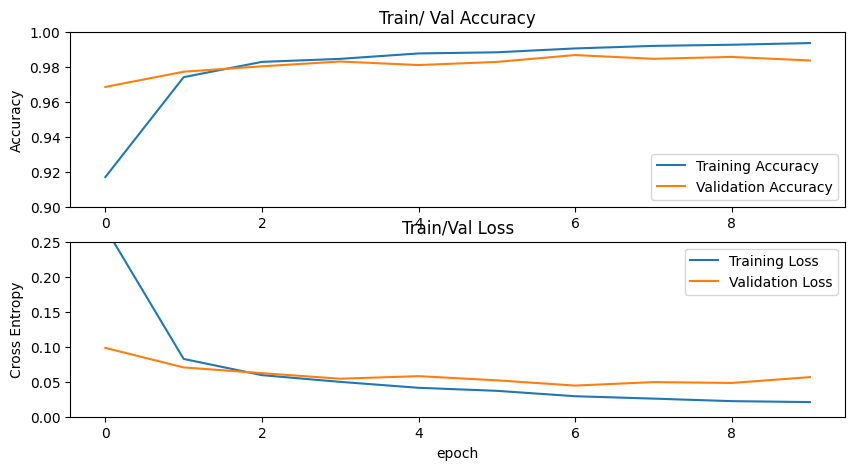

In [150]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0.9,1])
plt.title('Train/ Val Accuracy')



plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.ylabel('Cross Entropy')
plt.ylim([0,0.25])
plt.title('Train/Val Loss')
plt.xlabel('epoch')
plt.show()

In [151]:
y_pred = model.predict(X_test)

263/263 [==============================] - 2s 7ms/step


In [152]:
y_pred=np.argmax(y_pred,axis=1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       909
           2       0.98      0.99      0.99       846
           3       0.98      0.99      0.99       937
           4       0.99      0.97      0.98       839
           5       1.00      0.95      0.98       702
           6       0.99      0.98      0.98       785
           7       0.98      0.99      0.98       893
           8       0.98      0.98      0.98       835
           9       0.97      0.99      0.98       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



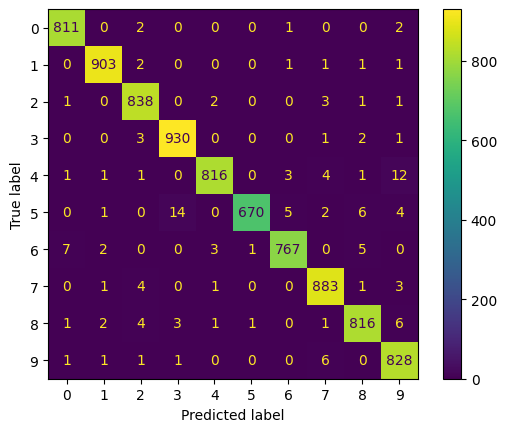

In [153]:
print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm)
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [154]:
scores = model.evaluate(X_test, y_test, verbose = 10 )
print ( scores )

[0.05654212087392807, 0.9835714101791382]


In [155]:
model.save('CNN_Model.h5')